# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [63]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

sizes = train['sizes']
coords = train['coords']
print('Data read successfuly')

print(X_train[0].shape)



Data read successfuly
(32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [64]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) +1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

1
Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})


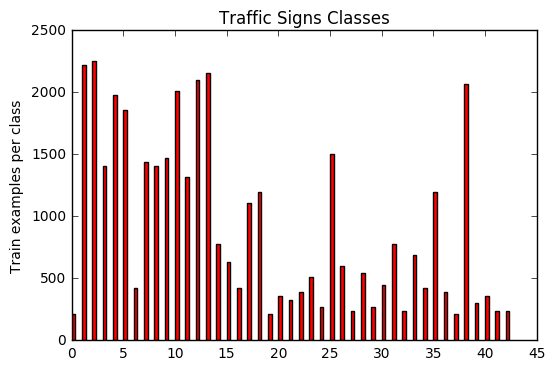

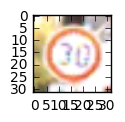

In [78]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import collections
# Visualizations will be shown in the notebook.
%matplotlib inline


N = n_classes
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

# Number of train examples per class
features_per_label = ()
train_data_per_label = collections.Counter(y_train)

for label in range(n_classes):
    features_per_label = features_per_label + (train_data_per_label[label],)
    

fig, ax = plt.subplots()
rects = ax.bar(ind, features_per_label, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Train examples per class')
ax.set_title('Traffic Signs Classes')

#Show random image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])


print(train_data_per_label)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

34


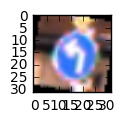

Normalizing features...
Data preprocessed


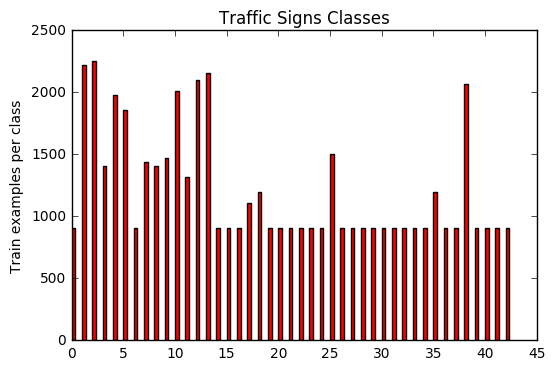

In [79]:
#### Generate additional data for classes with low number of train samples
import scipy.ndimage
from sklearn.model_selection import train_test_split

# Determine data with less than average examples 

averag_training_samples = n_train // n_classes
low_samples_labels = []    #labels with less train samples  

for label in train_data_per_label:
    if (train_data_per_label[label] < averag_training_samples):
        low_samples_labels.append(label)

# Increase the number of samples for every label with less average samples
# until every label has at least number of train samples equals the average

new_features = []
new_labels = []
index = 0  # Index to iterate through labels
counter = 0


for label in low_samples_labels:
    
    counter = 0
    index = 0
    
    # number of required added samples until reach the average number
    # of samples for every label
    # divided by 4 because during iteration on labels every label match
    # we will add 4 rotated copies of the sample
    new_samples = int((averag_training_samples - train_data_per_label[label])/4)
    
    
    for added_sample in range(new_samples):
        # search the labels to find the target label 
        # then add 4 rotated images of the sign image to features
        # and the label to labels
        # until we add the required number of samples
        for label_index in range(index,len(y_train),1):
            if (y_train[label_index] == label):
                index = label_index
                # Add the extra samples
                angles = [-5, 5, -10, 10]
                for angle in angles:
                    new_features.append(scipy.ndimage.rotate(X_train[label_index],angle, reshape=False))
                    new_labels.append(label)
                break
       

    
#show random image from the new added
index = random.randint(0, len(new_features))
image = new_features[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(new_labels[index])
plt.show()

#Add new features to the train data
train_data_images = np.concatenate((X_train,new_features))
train_data_labels = np.concatenate((y_train,new_labels))

# Normalize features
print('Normalizing features...')
train_data_images = train_data_images / 255. * 0.8 + 0.1


### split the data into training/validation sets here.

train_features, valid_features, train_labels, valid_labels = train_test_split(
   train_data_images,
   train_data_labels,
   test_size=0.2,
   random_state=0
)

print('Data preprocessed')


# Visualize data after adding new features images.
%matplotlib inline


N = n_classes
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

# Number of train examples per class
features_per_label = ()
train_data_per_label = collections.Counter(train_data_labels)

for label in range(n_classes):
    features_per_label = features_per_label + (train_data_per_label[label],)
    

fig, ax = plt.subplots()
rects = ax.bar(ind, features_per_label, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Train examples per class')
ax.set_title('Traffic Signs Classes')






### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

From visualizing the training data, some classes had low number of sample images (train data).

So for these classes, I generated additional data as rotated images by small angles and make each class has the same minimum number of features.

Then normalized data between 0.1 and 0.9 to avoid high variance in data.

Then visualize data again and generate random image from the new added images to check.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

20% of the training data kept as validation data.
Kept the testing data until achieved a satisfying results from validation.

I generated additional data as rotated images by small angles and make each class has the same minimum number of features.


In [80]:
### Creating the network architecture
import tensorflow as tf
from tensorflow.contrib.layers import flatten



# Conver training and validation labels to One-hot encoded 
train_labels_oh = tf.one_hot(train_labels, n_classes).eval(session=tf.Session())
valid_labels_oh = tf.one_hot(valid_labels, n_classes).eval(session=tf.Session())
test_labels_oh = tf.one_hot(y_test, n_classes).eval(session=tf.Session())


# Hyperparameters
mu = 0
sigma = 0.1
EPOCHS = 20
BATCH_SIZE = 100


# Input placeholders

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.float32, (None, 43))
keep_prob = tf.placeholder(tf.float32) # probability to keep units


# Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
conv1 = tf.nn.relu(conv1)

# maxpooling the layer 1 output = 14x14x6
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


#Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
conv2 = tf.nn.relu(conv2)

# maxpooling the layer 2 output 
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#Flatten. Input = 5x5x16. Output = 400.
fc0   = flatten(conv2)

#Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b
fc1    = tf.nn.relu(fc1)


#Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.zeros(84))
fc2   = tf.matmul(fc1, fc2_W) + fc2_b
fc2    = tf.nn.relu(fc2)
fc2    = tf.nn.dropout(fc2, keep_prob)  # Do dropout


#Fully Connected. Input = 84. Output = n_classes
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))

logits = tf.matmul(fc2, fc3_W) + fc3_b

# Calcuate loss and use Adam opimizer 
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)

# Calculate Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Calculate prediction
prediction = tf.nn.softmax(logits)

# saver for the trained model 
saver = tf.train.Saver()



print('Done')


Done


In [81]:
### Evluation function

#Given a dataset as input returns the loss and accuracy.
# For simplicity 
# If dataset.num_examples is not divisible by BATCH_SIZE
# the remainder will be discarded.


def eval_data(features,labels):
    
    steps = len(features) // BATCH_SIZE
    num_examples = steps * BATCH_SIZE
    total_acc, total_loss = 0., 0.
    
    sess = tf.get_default_session()
        
    index = 0
    
    for step in range(steps):
        
        batch_x = features[index:(index+BATCH_SIZE)]
        batch_y = labels[index:(index+BATCH_SIZE)]
        
        
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
        
        index = index + BATCH_SIZE
        
    
    #return loss and accuracy
    return total_loss/num_examples, total_acc/num_examples


print('Done')

Done


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Network architecture consists of two convolutional layers then two fully connected layers and then the output layer.

Every convolutional layer has 5x5 filter with 1 as strides , then follwed by 2x2 max pooling with 2 as strides then add a bias, and apply a ReLU.

The two used fully-connected layer to allow processing on the entire image then add a bias, and apply a ReLU.

To reduce overfitting applied dropout before the readout layer.

Replaced the steepest gradient descent optimizer with the more sophisticated ADAM optimizer.

Included the additional parameter keep_prob to control the dropout rate.




In [82]:
### Training


with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for epoch in range(EPOCHS):
        steps = len(train_features) // BATCH_SIZE
        index = 0
        
        
        for step in range(steps):

            batch_x = train_features[index:(index+BATCH_SIZE)]
            batch_y = train_labels_oh[index:(index+BATCH_SIZE)]
            
            ## Training
            session.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
            
            index = index + BATCH_SIZE
            
            
        val_loss, val_acc = eval_data(valid_features,valid_labels_oh)
        print("EPOCH {} ...".format(epoch+1))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print()
            

    saver.save(session, 'model')
    print("Model saved")
            
            

print('Done')      


EPOCH 1 ...
Validation loss = 0.747
Validation accuracy = 0.817

EPOCH 2 ...
Validation loss = 0.398
Validation accuracy = 0.893

EPOCH 3 ...
Validation loss = 0.285
Validation accuracy = 0.922

EPOCH 4 ...
Validation loss = 0.226
Validation accuracy = 0.939

EPOCH 5 ...
Validation loss = 0.177
Validation accuracy = 0.956

EPOCH 6 ...
Validation loss = 0.160
Validation accuracy = 0.957

EPOCH 7 ...
Validation loss = 0.128
Validation accuracy = 0.967

EPOCH 8 ...
Validation loss = 0.115
Validation accuracy = 0.971

EPOCH 9 ...
Validation loss = 0.102
Validation accuracy = 0.975

EPOCH 10 ...
Validation loss = 0.121
Validation accuracy = 0.969

EPOCH 11 ...
Validation loss = 0.096
Validation accuracy = 0.977

EPOCH 12 ...
Validation loss = 0.084
Validation accuracy = 0.980

EPOCH 13 ...
Validation loss = 0.084
Validation accuracy = 0.979

EPOCH 14 ...
Validation loss = 0.080
Validation accuracy = 0.981

EPOCH 15 ...
Validation loss = 0.071
Validation accuracy = 0.984

EPOCH 16 ...
Valida

In [83]:
# Testing data
test_features = np.array(X_test) / 255 * 0.8 + 0.1

with tf.Session() as session:
    
    #Load saved session
    saver.restore(session, tf.train.latest_checkpoint('.'))
    
    #Testing
    test_loss, test_acc = eval_data(test_features,test_labels_oh)
    
    
    print("Testing accuracy = {:.3f}".format(test_acc))


Testing accuracy = 0.921


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In the train I used ADAM optimizer instead of gradient descent optimizer.

Ran it for 20 epochs with batch size = 100

I kept 20% of the train data as validation data to observe the loss and accuracy every epoch.

Trial and error applied for the batch size and the number of epochs.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with the LeNet architecture.

Trial and error applied for the batch size and the number of epochs.

I kept the test data until I got satisfied with the accuracy from the validation data.

Suffered at the beginning from overfitting then applied dropout before the readout layer to reduce it.

Started with gradient descent optimizer then replaced it with ADAM optimizer.

After 20 epochs there was no improvement in the accuracy.

I tried adding more convolution networks but there was no improvement and increased the computation time considering that the classified signs in the train images are centered.

Got satisfying 0.921 on the testing data.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

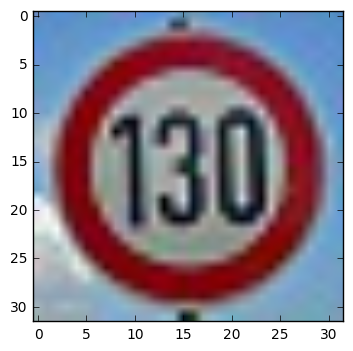

130.png


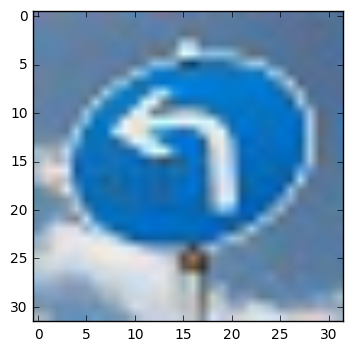

left.png


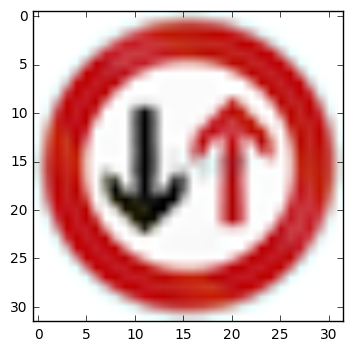

notExist.png


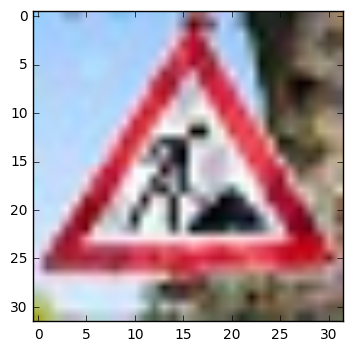

Road_work.png


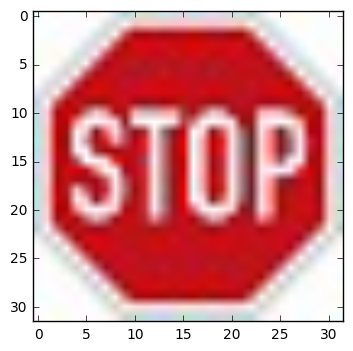

stop.png


In [100]:
import matplotlib.image as mpimg

imgs = ['130.png', 'left.png', 'notExist.png', 'Road_work.png', 'stop.png']

new_images = []

for imagename in imgs:
    image = mpimg.imread('test_images/' + imagename)
    new_images.append(image)
    plt.imshow(image)
    plt.show()
    print(imagename)
    
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I got five candidate images from the internet and I cropped the signs and rescaled them to 32x32 pixels, I choose those images as following:-

1- "130.png"

It is a 130 speed limit sign, the training dataset images has collection of speed signs (ranges from 20 to 120) but it doesn't have sign with 130 written on the sign, so I wanted to test if the classifier will give it a high probability to be one of the speed signs classes. The result will be very interesting to know that the classification has enough quality to classify it as a speed limit sign class.

2- "left.png"
It is a turn left ahead sign but it is more difficult than the ones exist in the training dataset as it is a little not centered in the image and the image is not cropped, also the sign image is a little taken with an angle which makes the outer sign frame not a circle but a little more oval shape.

3- "notExist.png"
This sign is not exist among the train dataset images, so wanted to see what will be the outcome probabilities for it.


4- "Road_work.png"
5- "stop.png"

4th and 5th photos are similar to the ones exist in the training dataset, objective to check the cofidence of the classification for them.



In [101]:
new_images_predictions = 0

session = tf.Session()
    
#Load saved session
saver.restore(session, tf.train.latest_checkpoint('.'))
    
# get prediction for the new test images
new_images_predictions = session.run(prediction, feed_dict={x: new_images,keep_prob: 1.0})
    
    

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

For the "130.png" image which is a 130 speed limit sign with a written speed not exist among the speed limit signs in the training dataset, the model classified it with about 98% confidence as class 1 wich has a written speed limit 30 written on it, so the model classified it with high confidence to the nearest look alike sign class in the speed limit signs classes, my thought that it is very good performance to classify it to a kind of similar class **but** I think the 98%  confidence is too high.

For the "left.png", "Road_work.png" and "stop.png" they have been classified correctly with about 99% confidence.

The "notExist.png" image which is not exist in the training dateset, it gave it about 64% confidence to be a class 3 (speed limit sign), I think that's because it looks like the speed limit signs with the circular red frame and white sign background.


**From testing those 5 new images, I believe that the model is still kind of overfitted and needs to more generalize its behavior.**



In [102]:

for img in range(len(new_images)):
    print('*******************')
    print(imgs[img])
    print(new_images_predictions[img])
    print('*******************')
    

*******************
130.png
[  2.92326198e-11   9.86234426e-01   1.23021146e-02   7.78832909e-09
   6.06602555e-07   1.60495201e-05   8.79993430e-24   1.44585222e-03
   9.67094252e-07   4.93075906e-26   4.80315418e-22   4.38924669e-23
   1.32613259e-21   7.93684443e-22   1.79546852e-18   5.02112349e-13
   6.23298915e-27   1.07529778e-25   3.43260267e-17   1.08420698e-25
   8.29176418e-22   1.59079405e-18   1.27540874e-26   1.76595951e-27
   1.06694748e-15   1.86099855e-17   4.15082326e-23   1.96763830e-18
   1.58215352e-16   2.62225502e-11   2.62729683e-22   2.32004411e-12
   1.74069295e-25   1.74162540e-22   1.38002023e-32   7.74035793e-25
   3.18692391e-28   4.46877437e-29   2.32232084e-26   1.43036120e-22
   3.56729627e-19   3.75523173e-34   3.80384501e-28]
*******************
*******************
left.png
[  0.00000000e+00   0.00000000e+00   3.17742530e-36   8.52723146e-22
   0.00000000e+00   1.77475708e-26   2.88886310e-38   0.00000000e+00
   0.00000000e+00   7.59929185e-26   1.286

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

With k=2  the correct predictions appear in the top 2

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [103]:
new_images_predictions = session.run(tf.nn.top_k(prediction, 2), feed_dict={x: new_images,keep_prob: 1.0})

for img in range(len(new_images)):
    print('*******************')
    print(imgs[img])
    print(new_images_predictions.values[img])
    print(new_images_predictions.indices[img])
    print('*******************')

*******************
130.png
[ 0.98623443  0.01230211]
[1 2]
*******************
*******************
left.png
[  9.99999762e-01   2.84521633e-07]
[34 38]
*******************
*******************
notExist.png
[ 0.64199269  0.35771486]
[ 3 41]
*******************
*******************
Road_work.png
[  9.99491453e-01   4.87823068e-04]
[25  1]
*******************
*******************
stop.png
[  9.99226809e-01   7.56089867e-04]
[14  1]
*******************
